In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from templates import *
from templates_latent import *
from train_unconditional import *

/home/rg625/mnt/diffae/metrics.py:10: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [3]:
device = 'cuda:0'
conf = ffhq128_ddpm_130M()
conf.T_eval = 100
conf.latent_T_eval = 100
print(conf.name)
model = LitModel(conf)
state = torch.load(f'checkpoints/{conf.name}/last.ckpt', map_location='cpu')
print(model.load_state_dict(state['state_dict'], strict=True))
# print(model)
print(state['state_dict'].keys())
model.to(device);

Global seed set to 0


ffhq128_ddpm_130M_ss1
Model params: 94.05 M


/tmp/ipykernel_754508/3085447560.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(f'checkpoints/{conf.name}/last.ckpt', map_location='cpu')


<All keys matched successfully>
odict_keys(['x_T', 'model.time_embed.0.weight', 'model.time_embed.0.bias', 'model.time_embed.2.weight', 'model.time_embed.2.bias', 'model.input_blocks.0.0.weight', 'model.input_blocks.0.0.bias', 'model.input_blocks.1.0.in_layers.0.weight', 'model.input_blocks.1.0.in_layers.0.bias', 'model.input_blocks.1.0.in_layers.2.weight', 'model.input_blocks.1.0.in_layers.2.bias', 'model.input_blocks.1.0.emb_layers.1.weight', 'model.input_blocks.1.0.emb_layers.1.bias', 'model.input_blocks.1.0.out_layers.0.weight', 'model.input_blocks.1.0.out_layers.0.bias', 'model.input_blocks.1.0.out_layers.3.weight', 'model.input_blocks.1.0.out_layers.3.bias', 'model.input_blocks.2.0.in_layers.0.weight', 'model.input_blocks.2.0.in_layers.0.bias', 'model.input_blocks.2.0.in_layers.2.weight', 'model.input_blocks.2.0.in_layers.2.bias', 'model.input_blocks.2.0.emb_layers.1.weight', 'model.input_blocks.2.0.emb_layers.1.bias', 'model.input_blocks.2.0.out_layers.0.weight', 'model.input_bl

In [4]:
torch.manual_seed(4)
imgs = model.sample(8, device=device, T=20, T_latent=200)

/home/rg625/mnt/diffae/diffusion/base.py:307: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(self.conf.fp16):


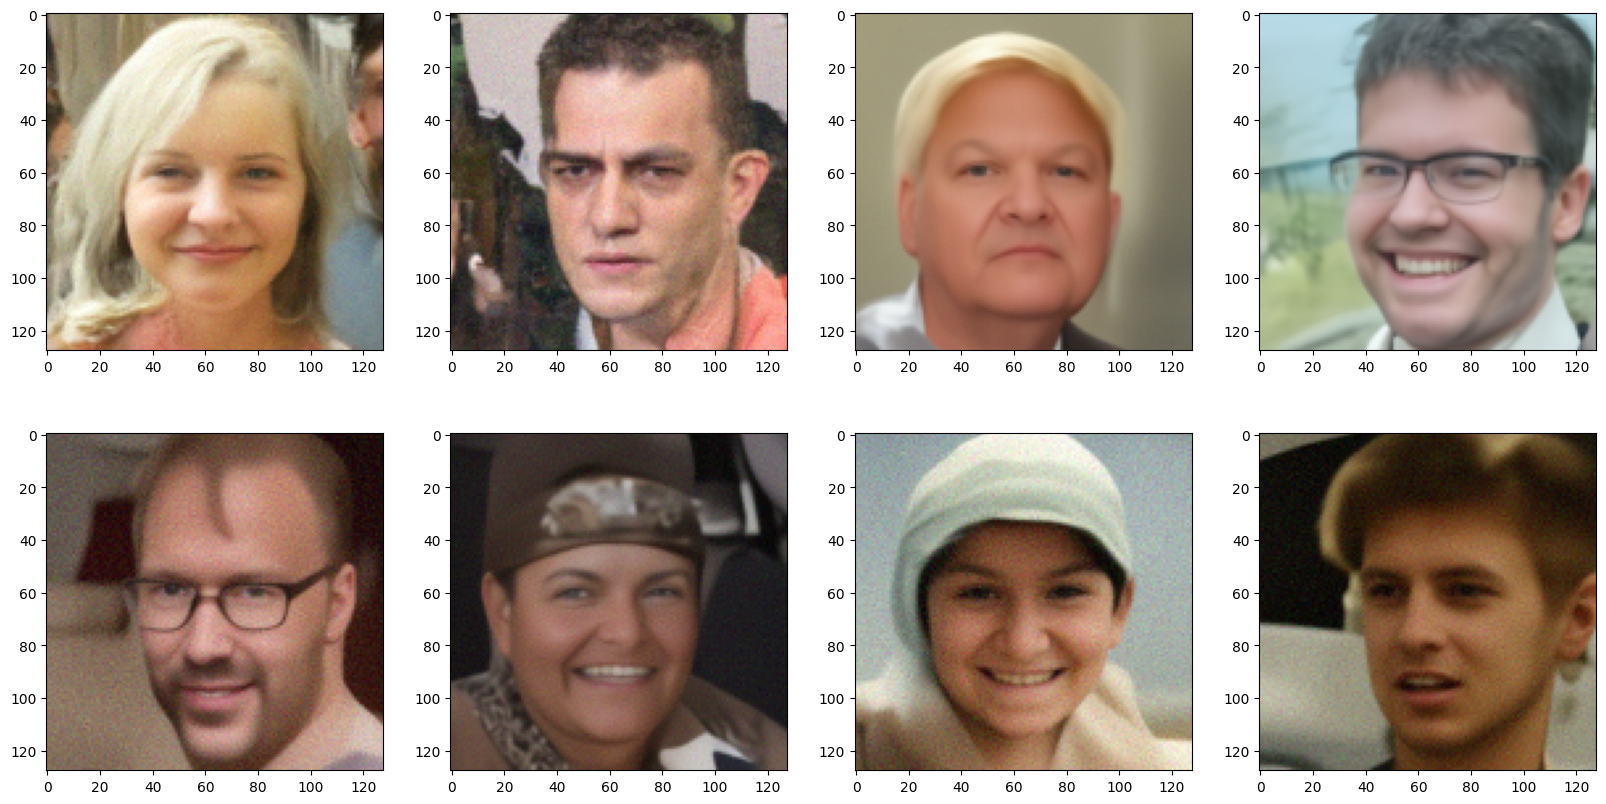

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 4, figsize=(4*5, 2*5))
ax = ax.flatten()
for i in range(len(imgs)):
    ax[i].imshow(imgs[i].cpu().permute([1, 2, 0]))